#Logistic Regression

In [266]:
iterations = 11560 #@param {type:"slider", min:100, max:15000, step:10}
lambda_var = 47 #@param {type:"slider", min:0, max:500, step:1}

Loading data from a csv and normalize feature


     X    Pclass       Sex       Age
0    1  0.910594 -0.758520 -0.530005
1    1 -1.475329  1.316511  0.571430
2    1  0.910594  1.316511 -0.254646
3    1 -1.475329  1.316511  0.364911
4    1  0.910594 -0.758520  0.364911
..  ..       ...       ...       ...
709  1  0.910594  1.316511  0.640270
710  1 -0.282368 -0.758520 -0.185807
711  1 -1.475329  1.316511 -0.736524
712  1 -1.475329 -0.758520 -0.254646
713  1  0.910594 -0.758520  0.158392

[714 rows x 4 columns]


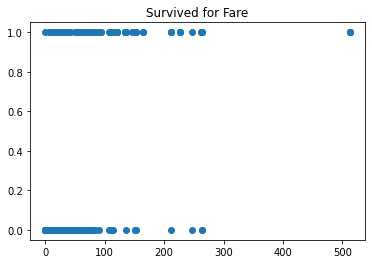

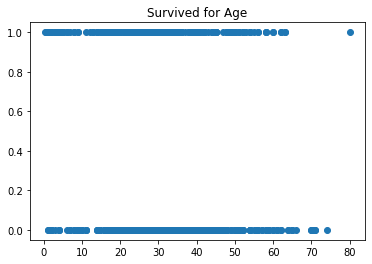

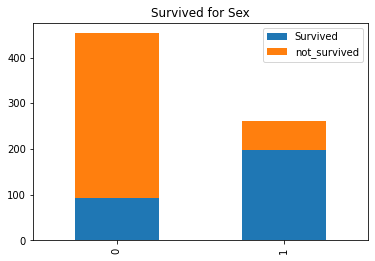

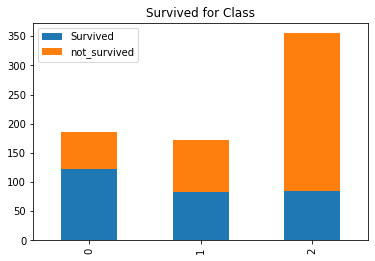

In [269]:
def feature_scaling(features):
  features_scaled = features.copy()
  for i in range(features.shape[1]):
    features_scaled[features.columns[i]] = pd.DataFrame(features.iloc[:,i].apply(lambda x : ((x - features.iloc[:,i].mean())/features.iloc[:,i].std())))
  return features_scaled

titanic_data = pd.read_csv("https://raw.githubusercontent.com/micbrie/Homework-AI/main/titanicTrain.csv")
features = titanic_data.iloc[:,range(1,4,1)]
features = feature_scaling(features)
features['X'] = 1;
features = features[['X','Pclass','Sex','Age']]
#excluding 'fare' not correlated to survive or not, index of correlation
print(features)
output = titanic_data.iloc[:,0]
plt.title("Survived for Fare")
plt.scatter([titanic_data.Fare],[titanic_data.Survived])
plt.show()
plt.title("Survived for Age")
plt.scatter([titanic_data.Age],[titanic_data.Survived])
plt.show()
grafico = titanic_data[titanic_data['Survived'] == 1].groupby(['Sex'])['Survived'].count().reset_index()
grafico['not_survived'] = titanic_data[titanic_data['Survived'] == 0].groupby(['Sex'])['Survived'].count().reset_index().Survived
grafico[['Survived','not_survived']].plot.bar(stacked=True,title = "Survived for Sex")
grafico2 = titanic_data[titanic_data['Survived'] == 1].groupby(['Pclass'])['Survived'].count().reset_index()
grafico2['not_survived'] = titanic_data[titanic_data['Survived'] == 0].groupby(['Pclass'])['Survived'].count().reset_index().Survived
grafico2[['Survived','not_survived']].plot.bar(stacked=True,title = "Survived for Class")


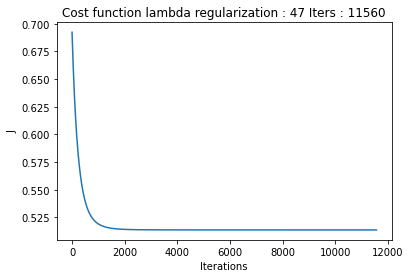

In [270]:
def sigmoid(z) :
  g = 1 / (1+np.exp(-1*z));
  return g

def costFunction(X, y, theta) :
  m = y.shape[0] 
  h = sigmoid(np.dot(X, theta))
  cost = -y * np.log(h) - (1-y) * np.log(1-h)
  thetawithoutt0 = np.copy(theta)
  thetawithoutt0[0] = 0
  J = (1 / m) * sum(cost) + lambda_var/(2*m)*sum(thetawithoutt0**2)
  return J

def gradientDescent(X, y, theta, alpha, lambda_var) :
  m = y.shape[0]
  J_history = np.zeros(iterations)
  for iter in range(iterations) :
    h = sigmoid(np.dot(X, theta))
    theta =  theta*(1-alpha*lambda_var/m) - (alpha/m)*np.dot(X.T, (h-y))
    J_history[iter] = costFunction(X, y, theta, lambda_var)
  return theta, J_history

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



theta = np.zeros(features.shape[1])
alpha = 0.007
theta, cost_function = gradient_descent(features,output,theta,alpha,lambda_var)
plt.plot(cost_function)
plt.title("Cost function lambda regularization : " + str(lambda_var) + " Iters : " + str(iterations))
plt.xlabel("Iterations")
plt.ylabel("J")
plt.show()

In [271]:
X_predict = pd.DataFrame([[1, 0, 30] ,[2, 0, 30] ,[3, 0, 30], [1, 1, 30] ,[2, 1, 30],[3, 1, 30], [3, 0, 10] ,[3, 0, 20] ,[3, 0, 80]],columns=['Pclass','Sex','Age'])
X_predict = feature_scaling(X_predict)
X_predict['X'] = 1
X_predict = X_predict[['X','Pclass','Sex','Age']]
probabilities = sigmoid(np.dot(X_predict,theta))
print("Probabilities : " + str(probabilities))
print("Predictions : " + str(np.round(probabilities) == 1))

Probabilities : [0.52649012 0.34912192 0.20556611 0.85689438 0.74283782 0.58219968
 0.25356829 0.22868232 0.11584903]
Predictions : [ True False False  True  True  True False False False]
